# Regresión Regularizada con Ridge y Lasso

Katlyn Mackness <br>
03/12/2024 - Updated 20/02/2025 <br>
Objetivo: Encontrar el modelo de regresión para resultados más precisos.

In [3]:
# Importar librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

import warnings 
warnings.filterwarnings('ignore')

df = pd.read_csv("Data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230


## Limpiar los Datos

In [4]:
# Remover caracteristicas categoricas
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2022,2.4,4,9.9,7.0,8.6,33,200
1,2022,3.5,6,12.6,9.4,11.2,25,263
2,2022,2.0,4,11.0,8.6,9.9,29,232
3,2022,2.0,4,11.3,9.1,10.3,27,242
4,2022,2.0,4,11.2,8.0,9.8,29,230


<Axes: >

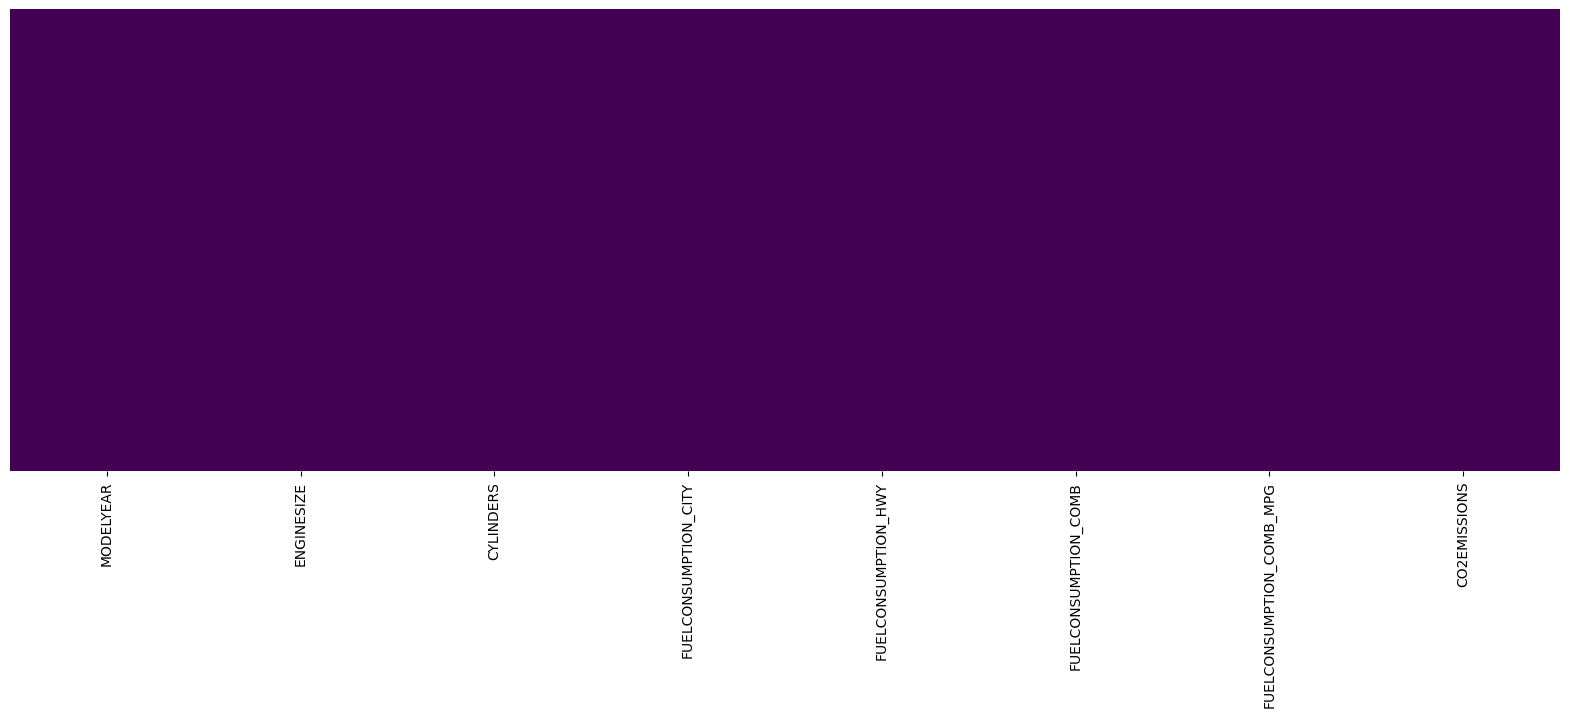

In [5]:
# Verifique que no existan datos nulos
plt.figure(figsize=(20,6))
sns.heatmap(df_numeric.isnull(),yticklabels=False, cbar=False, cmap='viridis')

## Análisis de regresión múltiple

In [6]:
# Division en grupos de entrenamiento (training) y de prueba (testing)
X = df_numeric.drop(columns=['CO2EMISSIONS'])
y = df_numeric['CO2EMISSIONS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [7]:
# Construccion de un modelo de regresion lineal multiple
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [8]:
# Impresion de coefiencietes de regresion
print("Intercepto: ", linreg.intercept_)
print("Coeficientes: ", linreg.coef_)

Intercepto:  124.05613100622395
Coeficientes:  [ 0.         -0.01515148  6.43036425 -1.32628678  0.52702525 14.53834062
 -1.88292508]


## Predicciones

In [9]:
y_pred = linreg.predict(X_test)
y_pred

array([318.82062694, 322.84703822, 345.23551728, 174.78239603,
       196.73994807, 250.37345085, 240.2772048 , 332.29424162,
       327.80185548, 173.64652185, 275.75871276, 227.67606101,
       323.15858211, 264.7147751 , 175.92922152, 267.50620255,
       162.5548175 , 220.68619289, 337.80918664, 326.56057625,
       322.84703822, 339.48137878, 259.20584163, 220.68619289,
       339.76297512, 201.8255166 , 364.62108712, 334.53095579,
       286.6535063 , 137.95706661, 179.28808399, 175.92922152,
       238.60801519, 291.97541448, 312.36078823, 291.32632034,
       330.50151422, 317.77510602, 327.80185548, 218.69601311,
       302.19635808, 294.44143376, 228.58586706, 182.33789374,
       170.20435766, 247.91950372, 193.35806215, 343.30481828,
       152.91430008, 184.32703834, 291.68467823, 239.45777535,
       170.44542168, 262.19926692, 112.39018005, 312.507081  ,
       343.13766885, 335.91261837, 307.08026329, 385.77737538,
       198.41216797, 150.50258803, 186.61208853, 304.78

In [10]:
# impresion de indicadores de bondad de ajuste
linreg_r2 = r2_score(y_test, y_pred)
linreg_mae = metrics.mean_absolute_error(y_test, y_pred)
linreg_mse = metrics.mean_squared_error(y_test, y_pred)
linreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Valor de R-cuadrada: ", linreg_r2)
print("Error absoluto medio: ", linreg_mae)
print("Error cuadradicto medio: ", linreg_mse)
print("Raiz del Error cuadratico medio: ", linreg_rmse)


Valor de R-cuadrada:  0.9775327964689396
Error absoluto medio:  6.4183220979861835
Error cuadradicto medio:  85.97881014782175
Raiz del Error cuadratico medio:  9.272475944849992


### Interpretación
R2 sugiere que el modelo tiene un ajuste muy bueno.
MAE y RMSE sguieren que el modelo es precisoen sus predicciones.

## Regresión Ridge

In [11]:
# Repita el ejercicio 3 pero aplicando un modelo de regresión Ridge
#  mediante el valor de Alpha óptimo.
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalizar conjuntos de prueba y entranamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Entrenamiento y prediccion
ridgereg = Ridge(alpha=0.1)
ridgereg.fit(X_train_scaled, y_train)
y_pred = ridgereg.predict(X_test_scaled)

# impresion de indicadores de bondad de ajuste
ridgereg_r2 = r2_score(y_test, y_pred)
ridgereg_mae = metrics.mean_absolute_error(y_test, y_pred)
ridgereg_mse = metrics.mean_squared_error(y_test, y_pred)
ridgereg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Valor de R-cuadrada: ", ridgereg_r2)
print("Error absoluto medio: ", ridgereg_mae)
print("Error cuadradicto medio: ", ridgereg_mse)
print("Raiz del Error cuadratico medio: ", ridgereg_rmse)


Valor de R-cuadrada:  0.9775492603916646
Error absoluto medio:  6.407899977140615
Error cuadradicto medio:  85.91580504421415
Raiz del Error cuadratico medio:  9.269077896113192


In [13]:
# Definicion un rango de prueba para Alpha óptimo
alpha_range = 10.**np.arange(-2,3)
ridgeregcv = RidgeCV(alphas=alpha_range, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train_scaled, y_train)
print("Alpha óptimo: ", ridgeregcv.alpha_)

Alpha óptimo:  10.0


In [14]:
# Prediccions
y_pred = ridgeregcv.predict(X_test_scaled)

# impresion de indicadores de bondad de ajuste
ridgereg_r2 = r2_score(y_test, y_pred)
ridgereg_mae = metrics.mean_absolute_error(y_test, y_pred)
ridgereg_mse = metrics.mean_squared_error(y_test, y_pred)
ridgereg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Valor de R-cuadrada: ", ridgereg_r2)
print("Error absoluto medio: ", ridgereg_mae)
print("Error cuadradicto medio: ", ridgereg_mse)
print("Raiz del Error cuadratico medio: ", ridgereg_rmse)


Valor de R-cuadrada:  0.9776083305893947
Error absoluto medio:  6.438906078920603
Error cuadradicto medio:  85.68975175240088
Raiz del Error cuadratico medio:  9.256875917522114


### Interpretatción
Todas medidas mejoraron ligeramente

## Regresión Lasso

In [17]:
# Repita el ejercicio 3 pero aplicando un modelo de regresión Lasso 
# mediante el valor de Alpha óptimo. 
from sklearn.linear_model import Lasso, LassoCV

# Definicion del Alpha óptimo
lassoregcv = LassoCV(n_alphas=100, random_state=1)
lassoregcv.fit(X_train_scaled, y_train)
print("Alpha óptimo: ", lassoregcv.alpha_)

Alpha óptimo:  0.19258410759661038


In [18]:
# Examinacion de los coeficientes de la regresion Lasso
print("Intercepto: ", lassoregcv.intercept_)
print("Coeficientes: ", lassoregcv.coef_)

Intercepto:  261.5658093797277
Coeficientes:  [  0.           0.          12.30267426  16.22314177  12.44069485
  11.72515925 -14.27491959]


In [19]:
# Determinacion del grado de bondad de ajuste con Alpha = 0.01
y_pred = lassoregcv.predict(X_test_scaled)

# impresion de indicadores de bondad de ajuste
lassoreg_r2 = r2_score(y_test, y_pred)
lassoreg_mae = metrics.mean_absolute_error(y_test, y_pred)
lassoreg_mse = metrics.mean_squared_error(y_test, y_pred)
lassoreg_rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Valor de R-cuadrada: ", lassoreg_r2)
print("Error absoluto medio: ", lassoreg_mae)
print("Error cuadradicto medio: ", lassoreg_mse)
print("Raiz del Error cuadratico medio: ", lassoreg_rmse)


Valor de R-cuadrada:  0.9774650160464787
Error absoluto medio:  6.438695865860013
Error cuadradicto medio:  86.23819623770406
Raiz del Error cuadratico medio:  9.286452295559595


In [20]:
# Ver los resultados
indicadores = {
    'Modelo': ['Lineal Multiple', 'Ridge', 'Lasso'],
    'R2': [linreg_r2, ridgereg_r2, lassoreg_r2],
    'MAE': [linreg_mae, ridgereg_mae, lassoreg_mae],
    'MSE': [linreg_mse, ridgereg_mse, lassoreg_mse],
    'RMSE': [linreg_rmse, ridgereg_rmse, lassoreg_rmse]
}
indicadores_df = pd.DataFrame(indicadores)
indicadores_df


,Modelo,R2,MAE,MSE,RMSE
0,Lineal Multiple,0.977533,6.418322,85.978810,9.272476
1,Ridge,0.977608,6.438906,85.689752,9.256876
2,Lasso,0.977465,6.438696,86.238196,9.286452


## Conclusiones
No existe diferencia entre la primera regresión y la regresión Lasso, indicando que el modelo original es adecuado y que no hay multicolinearidad en los datos originales. 